In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv(r"C:\Users\SKAN\Downloads\archive (13)\bbc-text.csv")

In [37]:
df

category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]

In [38]:
df.shape

(2225, 2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [40]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [41]:
df.duplicated().sum()

99

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum()

0

In [44]:
df.shape

(2126, 2)

In [45]:
df["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [46]:
df['category_id'] = df['category'].factorize()[0]

In [47]:
df

category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

      category_id  
0               0  
1               1  
2               2  
3               2  
4               3  
...           ...  
2220            1  
2221            4  
2222            3  
2223            4  
2224            2  

[2126 rows x 3 columns]

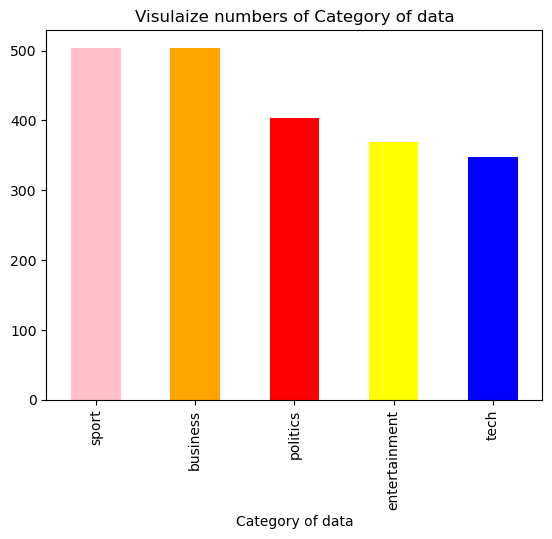

In [48]:
df['category'].value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue","green","cyan"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

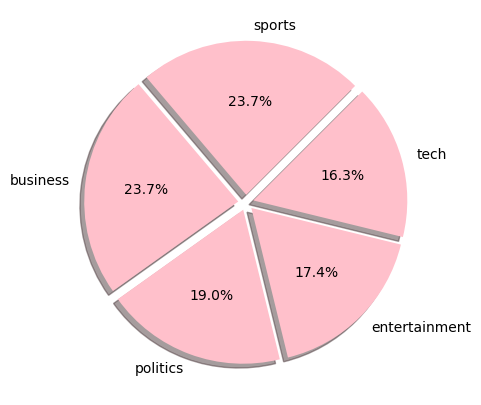

In [49]:
fig = plt.figure(figsize = (5,5))
colors = ["pink"]
pie = plt.pie(df["category_id"].value_counts(), labels = ['sports', 'business', 'politics', 'entertainment', 'tech'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [19]:
tf.__version__

'2.15.0'

In [102]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense

In [21]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SKAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# convert in lowercase
df['text']=df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['text'].head()


0    tv future in the hands of viewers with home th...
1    worldcom boss left books alone former worldcom...
2    tigers wary of farrell gamble leicester say th...
3    yeading face newcastle in fa cup premiership s...
4    ocean s twelve raids box office ocean s twelve...
Name: text, dtype: object

In [79]:
#Remove punctuation marks
df['text']=df['text'].str.replace('[^\w\s]','')
df['text'].head()


0    tv future in the hands of viewers with home th...
1    worldcom boss left books alone former worldcom...
2    tigers wary of farrell gamble leicester say th...
3    yeading face newcastle in fa cup premiership s...
4    ocean s twelve raids box office ocean s twelve...
Name: text, dtype: object

In [80]:
stop = set(stopwords.words('english'))

In [81]:
# removal of stopwords
df['text']=df['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df['text'].head()

0    tv future hands viewers home theatre systems p...
1    worldcom boss left books alone former worldcom...
2    tigers wary farrell gamble leicester say rushe...
3    yeading face newcastle fa cup premiership side...
4    ocean twelve raids box office ocean twelve cri...
Name: text, dtype: object

In [82]:
#lemmatization
wordnet = WordNetLemmatizer()
df['text'].apply(lambda x: " ".join([wordnet.lemmatize(word) for word in x.split()]))
df['text'].head()

0    tv future hands viewers home theatre systems p...
1    worldcom boss left books alone former worldcom...
2    tigers wary farrell gamble leicester say rushe...
3    yeading face newcastle fa cup premiership side...
4    ocean twelve raids box office ocean twelve cri...
Name: text, dtype: object

In [83]:
voc_size=5000

In [84]:
corpus=list(df['text'])
corpus

['tv future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talkedabout technologies ces digital personal video recorders dvr pvr settop boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also builtin highdefinition tv sets big business japan us slower take europe lack highdefinition programming people forward wind adverts also forget abiding network channel schedules putting together alacarte entertainment us networks cable satellite companies worried means terms advertising revenue

In [85]:
one_hot_rep=[one_hot(words,voc_size) for words in corpus]
one_hot_rep

[[3035,
  3624,
  4037,
  3018,
  470,
  2710,
  2694,
  4471,
  1674,
  4771,
  4630,
  3223,
  4147,
  4020,
  2991,
  5,
  3667,
  1412,
  1958,
  3035,
  3709,
  174,
  1204,
  3684,
  668,
  1758,
  4407,
  1468,
  4415,
  3755,
  569,
  804,
  4443,
  2472,
  3107,
  4989,
  4800,
  3760,
  575,
  1971,
  2661,
  203,
  187,
  3556,
  607,
  4676,
  691,
  2930,
  3018,
  90,
  470,
  3491,
  415,
  4831,
  2915,
  3487,
  3111,
  1826,
  3590,
  429,
  2418,
  1579,
  1462,
  1971,
  1686,
  3760,
  4238,
  4630,
  2844,
  3223,
  4147,
  309,
  4175,
  2784,
  3272,
  3523,
  187,
  3762,
  4024,
  4195,
  2812,
  3526,
  1412,
  1722,
  3953,
  2035,
  4339,
  3372,
  4096,
  3035,
  4676,
  2410,
  2614,
  4758,
  2433,
  1978,
  2240,
  3035,
  2687,
  2280,
  1674,
  3035,
  1592,
  1927,
  2979,
  1679,
  187,
  1516,
  4533,
  1702,
  1313,
  1674,
  1498,
  1412,
  3372,
  4096,
  3216,
  2687,
  3664,
  1798,
  3606,
  931,
  4046,
  624,
  1787,
  748,
  428,
  187,
  

In [109]:
sent_len=20
embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=sent_len)
embedded_docs

array([[3506, 3267, 2364, ..., 1958, 2410, 2410],
       [3289,  258, 2725, ...,  155, 3701, 3403],
       [4049,  569, 1316, ...,  329, 3761, 2817],
       ...,
       [3352, 3740, 3576, ..., 3083, 3227, 1704],
       [2359,  659, 1971, ..., 2695, 3167, 2336],
       [2926, 2853, 4507, ..., 3624,  361, 4699]])

In [110]:
embedded_docs[0]

array([3506, 3267, 2364, 1412, 2035, 1059, 4676, 2948, 2489, 4076, 1462,
       1297,  281,  607, 2556, 1031, 1412, 1958, 2410, 2410])

In [111]:

model=Sequential()
model.add(Embedding(voc_size,40,input_length=sent_len))
model.add(LSTM(150))
model.add(Dense(1,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_6 (LSTM)               (None, 150)               114600    
                                                                 
 dense_6 (Dense)             (None, 1)                 151       
                                                                 
Total params: 314751 (1.20 MB)
Trainable params: 314751 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [112]:
x=np.array(df["text"])
y=np.array(df["category_id"])

In [117]:
x.shape

(2126,)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [116]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64)

Epoch 1/50


ValueError: in user code:

    File "C:\Users\SKAN\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\SKAN\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SKAN\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\SKAN\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\SKAN\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\SKAN\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "lstm_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 40)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=True
      • mask=None
